# Solutions - Homework 2

## Question 1

In [1]:
import numpy as np
import scipy
import statsmodels.api as linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.random.seed(1234)

In [2]:
## set parameters of simulation
n = 500
x = np.linspace(start=0.0,stop=1.0,num=n)
dof = 2
X = np.column_stack((np.ones(n),x,np.power(x,2)))
beta = np.array([1.0,2.0,4.0]).reshape((3,1))

In [3]:
fx = np.matmul(X,beta)[:,0]

In [4]:
## lad function to maximize
def LAD(betah):
    return(np.sum(np.abs(y - np.matmul(X,betah.reshape((3,1)))[:,0])))

## initial guess for LAD estimator
x0 = np.zeros(3)

In [5]:
## number of simulation runs
N = 500

In [6]:
## store simulation output in dictionary out
out = {}
for ii in ["OLSt","L1t","OLSnorm","L1norm","OLShet","L1het","WLShet"]:
    out[ii] = np.zeros((N,3))

In [7]:
## run the simulation
for jj in np.arange(N):
    ## generate normal errors and fit
    y = fx + np.random.normal(size=n)
    out["OLSnorm"][jj,:] = np.linalg.lstsq(X,y,rcond=None)[0]
    out["L1norm"][jj,:] = scipy.optimize.minimize(LAD,x0,method='Nelder-Mead', tol=1e-6).x
    ## generate some t errors and fit
    y = fx + np.random.standard_t(df=dof,size=n)
    out["OLSt"][jj,:] = np.linalg.lstsq(X,y,rcond=None)[0]
    out["L1t"][jj,:] = scipy.optimize.minimize(LAD,x0,method='Nelder-Mead', tol=1e-6).x
    ## generate heteroscedastic errors and fit
    sig = 0.1+ np.random.exponential(scale=1,size=n) 
    Y = fx + np.random.normal(loc=0,scale=sig,size=n)
    out["OLShet"][jj,:] = np.linalg.lstsq(X,y,rcond=None)[0]
    out["L1het"][jj,:] = scipy.optimize.minimize(LAD,x0,method='Nelder-Mead', tol=1e-6).x
    out["WLShet"][jj,:] = linear_model.WLS(y,X,weights=1/np.power(sig,2)).fit().params

Note: The line of code calling scipy.optimize.minimize is lazy in that the LAD function uses X and y which are not defined within LAD. It would be better / safer to have these as the arguments args. See here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

for general discussion or timing code blob (below) for doing this.


### Normal Error Plots

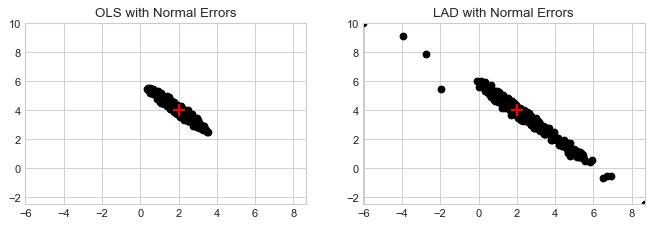

In [8]:
## get axis limits
xmax = max(np.max(out["OLSnorm"][:,1]),np.max(out["L1norm"][:,1]))
xmin = min(np.min(out["OLSnorm"][:,1]),np.min(out["L1norm"][:,1]))
ymax = max(np.max(out["OLSnorm"][:,2]),np.max(out["L1norm"][:,2]))
ymin = min(np.min(out["OLSnorm"][:,2]),np.min(out["L1norm"][:,2]))

## make plots
fig=plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(out["OLSnorm"][:,1], out["OLSnorm"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('OLS with Normal Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);
plt.subplot(1, 2, 2)
plt.plot(out["L1norm"][:,1], out["L1norm"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('LAD with Normal Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);


### t Distribution

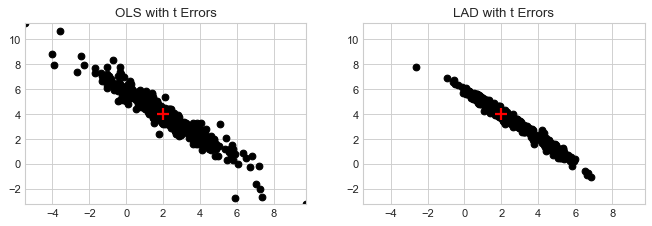

In [9]:
## get axis limits
xmax = max(np.max(out["OLSt"][:,1]),np.max(out["L1t"][:,1]))
xmin = min(np.min(out["OLSt"][:,1]),np.min(out["L1t"][:,1]))
ymax = max(np.max(out["OLSt"][:,2]),np.max(out["L1t"][:,2]))
ymin = min(np.min(out["OLSt"][:,2]),np.min(out["L1t"][:,2]))

## make plots
fig=plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.plot(out["OLSt"][:,1], out["OLSt"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('OLS with t Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);
plt.subplot(1, 2, 2)
plt.plot(out["L1t"][:,1], out["L1t"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('LAD with t Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);


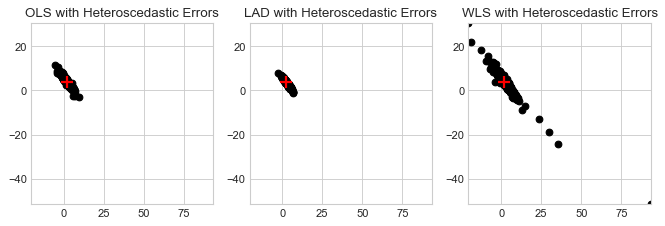

In [10]:
## get axis limits
xmax = max(np.max(out["OLShet"][:,1]),np.max(out["L1het"][:,1]),np.max(out["WLShet"][:,1]))
xmin = min(np.min(out["OLShet"][:,1]),np.min(out["L1het"][:,1]),np.min(out["WLShet"][:,1]))
ymax = max(np.max(out["OLShet"][:,2]),np.max(out["L1het"][:,2]),np.max(out["WLShet"][:,2]))
ymin = min(np.min(out["OLShet"][:,2]),np.min(out["L1het"][:,2]),np.min(out["WLShet"][:,2]))

## make plots
fig=plt.figure(figsize=(10, 3), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 3, 1)
plt.plot(out["OLShet"][:,1], out["OLShet"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('OLS with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);
plt.subplot(1, 3, 2)
plt.plot(out["L1het"][:,1], out["L1het"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('LAD with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);
plt.subplot(1, 3, 3)
plt.plot(out["WLShet"][:,1], out["WLShet"][:,2], 'o', color='black')
plt.plot(beta[1],beta[2],marker="+",color='red',markeredgewidth=2,markersize=10)
plt.title('WLS with Heteroscedastic Errors')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);


The LAD estimator works better (on average black points are closer to red point) with the t-distribution than LS because it is resistent to outliers. The LS estimator works better for normal errors. The WLS estimator works best for the heteroscedastic errors because it uses the correct inverse variances as the weights. The LAD estimator is better than the LS estimator for the heteroscedastic errors because it is robust to outliers. In general, models that are closer to the truth get better estimates. 

## Question 2

In [11]:
def run_lm():
    return np.linalg.lstsq(X,y,rcond=None)[0]

def run_l1():
    scipy.optimize.minimize(LAD,x0,method='Nelder-Mead', tol=1e-6).x

In [12]:
a = %timeit -o run_lm()

50.5 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
a = %timeit -o run_l1()

18.1 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
## LAD takes about 1000x longer to run

Now time LAD at a bunch of different sample sizes

In [15]:
ns = 10000*np.power(2,np.arange(6))
ns

array([ 10000,  20000,  40000,  80000, 160000, 320000], dtype=int32)

In [16]:
X = {}
Y = {}
for ii in ns:
    x = np.linspace(start=0.0,stop=1.0,num=ii)
    X[ii] = np.column_stack((np.ones(ii),x,np.power(x,2)))
    Y[ii] = np.matmul(X[ii],beta)[:,0]

In [17]:
def LAD(betah,Xh,yh):
    return(np.sum(np.abs(yh - np.matmul(Xh,betah.reshape((3,1)))[:,0])))

def run_l1(ii):
    scipy.optimize.minimize(LAD,x0,args=(X[ii],Y[ii]),method='Nelder-Mead', tol=1e-6).x

tms = []
for ii in ns:
    print(ii)
    a = %timeit -o run_l1(ii)
    tms.append(a.best)

10000
36.4 ms ± 5.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20000
52.3 ms ± 6.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
40000
104 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
80000
146 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
160000
1.74 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
320000
3 s ± 380 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
ns

array([ 10000,  20000,  40000,  80000, 160000, 320000], dtype=int32)

In [19]:
tms

[0.029775340158159126,
 0.04802245847800819,
 0.07779929987132839,
 0.1306960318799142,
 1.5967828530500157,
 2.6659818927335834]

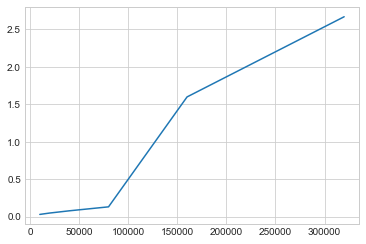

In [20]:
plt.plot(ns,tms);

Perhaps linear or slightly worse.